In [132]:
import random
import numpy as np
from scipy.stats import (binom,
                         norm)

import matplotlib.pyplot as plt

In [180]:
p_grid = np.arange(0, 1, 0.001)
prior = np.ones((len(p_grid), ), dtype=float)
#likelihood = binom.pmf(n=9, p=p_grid, k=6)
likelihood = norm.pdf(p_grid, loc=0.3, scale=0.1)
likelihood += norm.pdf(p_grid, loc=0.6, scale=0.1)
posterior = likelihood * prior
posterior = np.divide(posterior, np.sum(posterior), dtype=float)

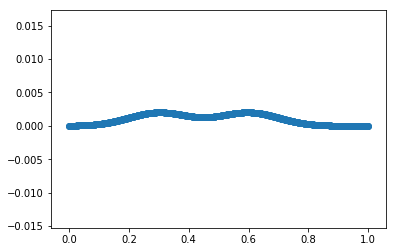

In [106]:
plt.scatter(p_grid, posterior)

In [182]:
def rejection_sample(x, p, size):
    """
    Given an arbitrary distribution, sample from it
    by rejection sampling using uniform random
    numbers. Function assumes x is sorted.
    
    param p: pmf values
    param x: x grid values associated
             with each pmf value
    param size: number of values to sample
    
    return samples: random numbers sampled
                    from p
    """
    ulow = np.min(x)
    uhigh = np.max(x)
    umax = np.divide(1, uhigh - ulow, dtype=float)
    pmax = np.max(p)
    c = np.divide(pmax, umax, dtype=float)
    
    samples = np.zeros((size, ), dtype=float)
    sample_size = 0
    while sample_size < size:
        u1 = np.random.uniform(low=ulow, high=uhigh)
        u2 = np.random.uniform(low=0, high=c)
        x_ix = np.searchsorted(x, u1)
        px = p[x_ix]
        if u2 < px:
            samples[sample_size] = u1
            sample_size += 1
    return samples

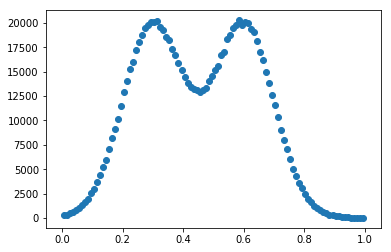

In [192]:
samples = rejection_sample(p_grid, posterior, size=1000000)
h, b = np.histogram(samples, bins=100)
c = b + 0.5*(b[1] - b[0])
plt.scatter(c[0:-1], h)

In [187]:
samples.tofile(open('bimodal_samples.dat', 'wb'), sep=',')